<a href="https://colab.research.google.com/github/CarlosSantini/Evaluacion_Tecnoap/blob/main/Tecnoap_Evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# Importar librerias a utilizar
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [57]:
# Cargar la informacion de los archivos Faults.train y Faults.test

data_train = pd.read_csv('Faults.train', delimiter='\t')
data_test = pd.read_csv('Faults.test', delimiter='\t')

# Información que sabemos a priori del dataset TRAIN 

1.   Tiene 27 atributos/variables independientes
2.   Tiene 7 clases/variables dependientes
3.   Registro de 1455 observaciones



## Información que sabemos a priori del dataset TEST 

1.   Tiene 27 atributos/variables independientes
2.   Registro de 485 observaciones


## Clases que se tienen registradas:

*   Pastry
*   Z_Scratch
*   K_Scatch
*	  Stains
*	  Dirtiness
*	  Bumps
*  	Other_Faults

# Data Exploration & Cleaning

In [58]:
# Conocer el tamaño de Faults.train y Faults.test

print(data_train.shape)
print(data_test.shape)

(1455, 35)
(485, 28)


In [59]:
# Visualizamos las columnas que conforman TRAIN
data_train.columns

Index(['Unnamed: 0', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [60]:
# Visualizamos las columnas que conforman TEST
data_test.columns

Index(['Unnamed: 0', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

In [61]:
# Conocer el tipo de dato de origen de cada columna en TRAIN
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1455 non-null   int64  
 1   X_Minimum              1455 non-null   int64  
 2   X_Maximum              1455 non-null   int64  
 3   Y_Minimum              1455 non-null   int64  
 4   Y_Maximum              1455 non-null   int64  
 5   Pixels_Areas           1455 non-null   int64  
 6   X_Perimeter            1455 non-null   int64  
 7   Y_Perimeter            1455 non-null   int64  
 8   Sum_of_Luminosity      1455 non-null   int64  
 9   Minimum_of_Luminosity  1455 non-null   int64  
 10  Maximum_of_Luminosity  1455 non-null   int64  
 11  Length_of_Conveyer     1455 non-null   int64  
 12  TypeOfSteel_A300       1455 non-null   int64  
 13  TypeOfSteel_A400       1455 non-null   int64  
 14  Steel_Plate_Thickness  1455 non-null   int64  
 15  Edge

In [62]:
# Conocer el tipo de dato de origen de cada columna en TEST
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             485 non-null    int64  
 1   X_Minimum              485 non-null    int64  
 2   X_Maximum              485 non-null    int64  
 3   Y_Minimum              485 non-null    int64  
 4   Y_Maximum              485 non-null    int64  
 5   Pixels_Areas           485 non-null    int64  
 6   X_Perimeter            485 non-null    int64  
 7   Y_Perimeter            485 non-null    int64  
 8   Sum_of_Luminosity      485 non-null    int64  
 9   Minimum_of_Luminosity  485 non-null    int64  
 10  Maximum_of_Luminosity  485 non-null    int64  
 11  Length_of_Conveyer     485 non-null    int64  
 12  TypeOfSteel_A300       485 non-null    int64  
 13  TypeOfSteel_A400       485 non-null    int64  
 14  Steel_Plate_Thickness  485 non-null    int64  
 15  Edges_

Al ejecutar la accion "info()", nos da detalles del tipo de dato que se encuentra en cada columna. Ademas, *"non-null"* ya nos indica que no hay informacion faltante, missing data. En este sentido indica que existe un valor en cada celda. Sin embargo, si hay algun valor de relleno para representar datos que faltan, eso no sería evidente aquí.

In [63]:
# Conocer como son los datos, tomamos las primeras 5 observaciones de TRAIN
data_train.head(5)

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,1309,1343,1351,46714,46725,56,11,11,5729,90,117,1362,1,0,70,0.0161,0.3636,0.7273,0.0059,0.7273,1.0000,1.0,1.7482,0.9031,1.0414,0.2727,-0.2007,0.1934,0,0,0,0,0,0,1
1,1132,354,370,409908,409918,116,19,10,12174,82,126,1360,0,1,40,0.5206,0.2750,0.6250,0.0118,0.8421,1.0000,0.0,2.0645,1.2041,1.0000,-0.3750,-0.1801,0.2792,0,0,0,0,0,1,0
2,1230,1056,1077,4364066,4364076,106,35,22,10747,89,116,1362,1,0,80,0.4185,0.4952,0.4762,0.0154,0.6000,0.4545,0.0,2.0253,1.3222,1.0000,-0.5238,-0.2079,0.3509,0,0,0,0,0,1,0
3,783,816,822,899659,899665,18,8,6,2384,127,141,1358,0,1,50,0.7894,0.5000,1.0000,0.0044,0.7500,1.0000,0.5,1.2553,0.7782,0.7782,0.0000,0.0347,0.1449,0,0,0,1,0,0,0
4,1762,78,94,1523381,1523431,463,69,54,60518,118,141,1360,0,1,130,0.1147,0.4212,0.3200,0.0118,0.2319,0.9259,1.0,2.6656,1.2041,1.6990,0.6800,0.0212,0.9650,0,0,0,0,0,0,1


In [64]:
# Conocer como son los datos, tomamos las primeras 5 observaciones de TEST
data_test.head(5)

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
1,4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000
2,6,413,446,138468,138883,9052,230,432,1481991,23,199,1687,0,1,150,0.4896,0.3390,0.0795,0.0196,0.1435,0.9607,1.0,3.9567,1.5185,2.6181,0.9205,0.2791,1.0000
3,9,74,90,779144,779308,1506,46,167,180215,53,143,1687,0,1,150,0.0877,0.4261,0.0976,0.0095,0.3478,0.9820,1.0,3.1778,1.2041,2.2148,0.9024,-0.0651,1.0000
4,12,46,58,179258,179312,480,15,54,61966,102,158,1687,0,1,150,0.0545,0.2593,0.2222,0.0071,0.8000,1.0000,1.0,2.6812,1.0792,1.7324,0.7778,0.0086,0.9093


## Rango de las variables

In [65]:
# Rango de las Variables en TRAIN
rango_TRAIN = pd.DataFrame()
# rango_TRAIN= pd.DataFrame(data=data_train.max()-data_train.min(), columns=['Rango'])
rango_TRAIN['Maximo'] = data_train.max()
rango_TRAIN['Minimo'] = data_train.min()
rango_TRAIN['Rango'] = data_train.max()-data_train.min()
rango_TRAIN

,Maximo,Minimo,Rango
Unnamed: 0,1.937000e+03,1.0000,1.936000e+03
X_Minimum,1.705000e+03,0.0000,1.705000e+03
X_Maximum,1.713000e+03,4.0000,1.709000e+03
Y_Minimum,1.298766e+07,6712.0000,1.298095e+07
Y_Maximum,1.298769e+07,6724.0000,1.298097e+07
Pixels_Areas,1.526550e+05,2.0000,1.526530e+05
X_Perimeter,1.044900e+04,2.0000,1.044700e+04
Y_Perimeter,1.815200e+04,1.0000,1.815100e+04
Sum_of_Luminosity,1.159141e+07,250.0000,1.159116e+07
Minimum_of_Luminosity,2.030000e+02,0.0000,2.030000e+02


* *Variables Categoricas*: TypeOfSteel_A300, TypeOfSteel_A400, Pastry, Z_Scratch,	K_Scatch,	Stains,	Dirtiness,	Bumps,	Other_Faults

* *Variables Numericas*: X_Minimum,	X_Maximum,	Y_Minimum,	Y_Maximum,	Pixels_Areas,	X_Perimeter,	Y_Perimeter,	Sum_of_Luminosity,	Minimum_of_Luminosity,	Maximum_of_Luminosity,	Length_of_Conveyer, Steel_Plate_Thickness,	Edges_Index,	Empty_Index,	Square_Index,	Outside_X_Index,	Edges_X_Index,	Edges_Y_Index, LogOfAreas,	Log_X_Index,	Log_Y_Index,	Orientation_Index,	Luminosity_Index,	SigmoidOfAreas,

## Frecuencia de las variables categoricas

In [66]:
# Obtener la Frecuencia en que aparecen los datos en las variables categoricas
# data_train['Y_Maximum'].describe()
print("TypeOfSteel_A300:\n",data_train['TypeOfSteel_A300'].value_counts(),"\n")   # <- value_counts() Regresa en orden descendente, el primer valor es el que mas se repite
print("TypeOfSteel_A400:\n",data_train['TypeOfSteel_A400'].value_counts(),"\n")

TypeOfSteel_A300:
 0    870
1    585
Name: TypeOfSteel_A300, dtype: int64 

TypeOfSteel_A400:
 1    870
0    585
Name: TypeOfSteel_A400, dtype: int64 



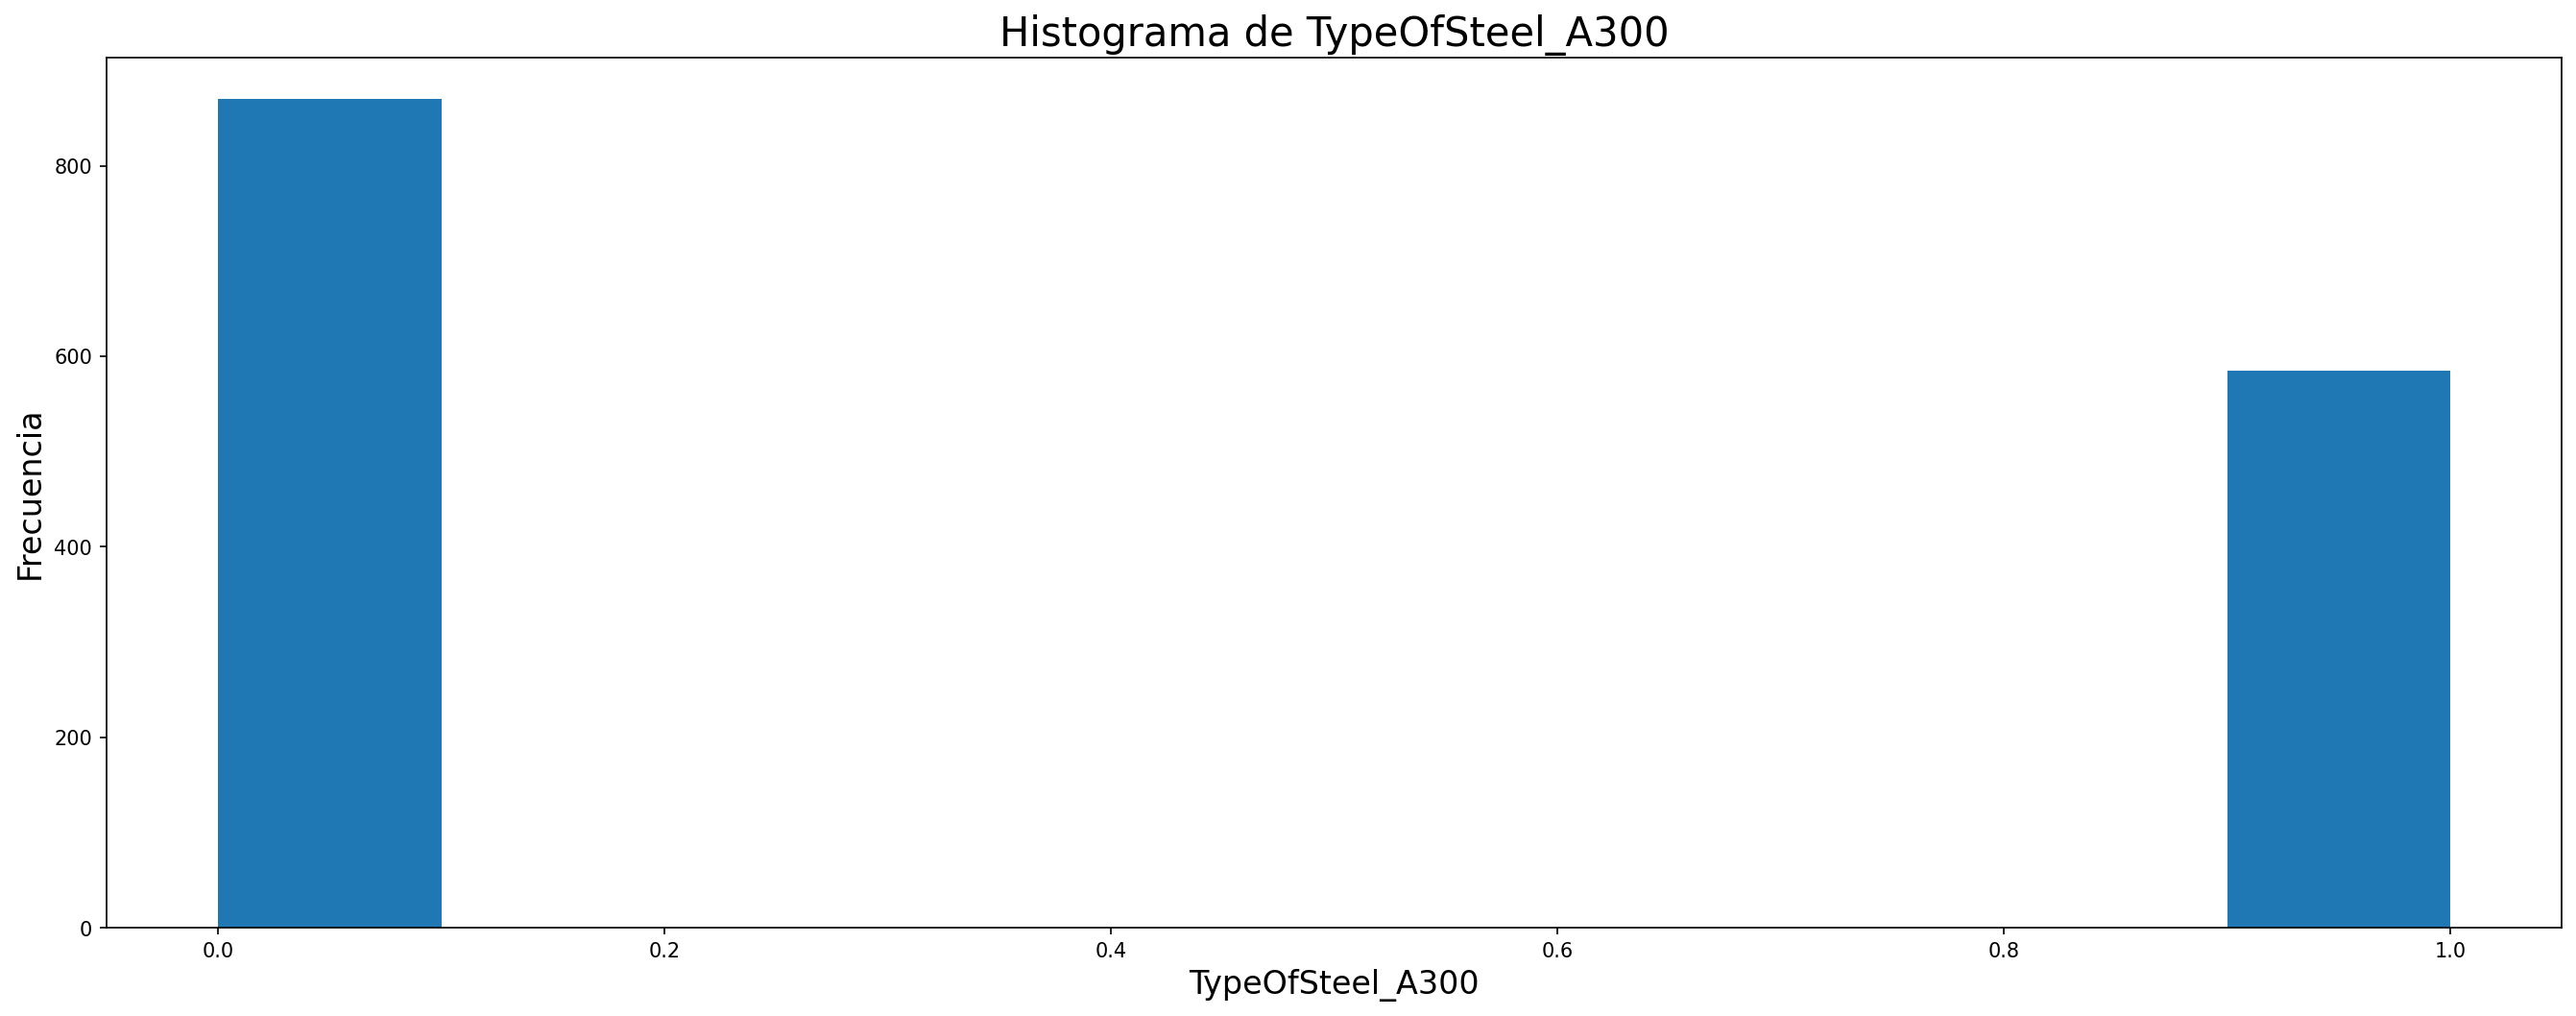

In [67]:
plt.figure(figsize=(22,8))
plt.hist(data_train['TypeOfSteel_A300'])
plt.xlabel(xlabel='TypeOfSteel_A300', fontsize=16)
plt.ylabel(ylabel='Frecuencia', fontsize=16)
plt.title('Histograma de TypeOfSteel_A300', fontsize=20)
plt.show()

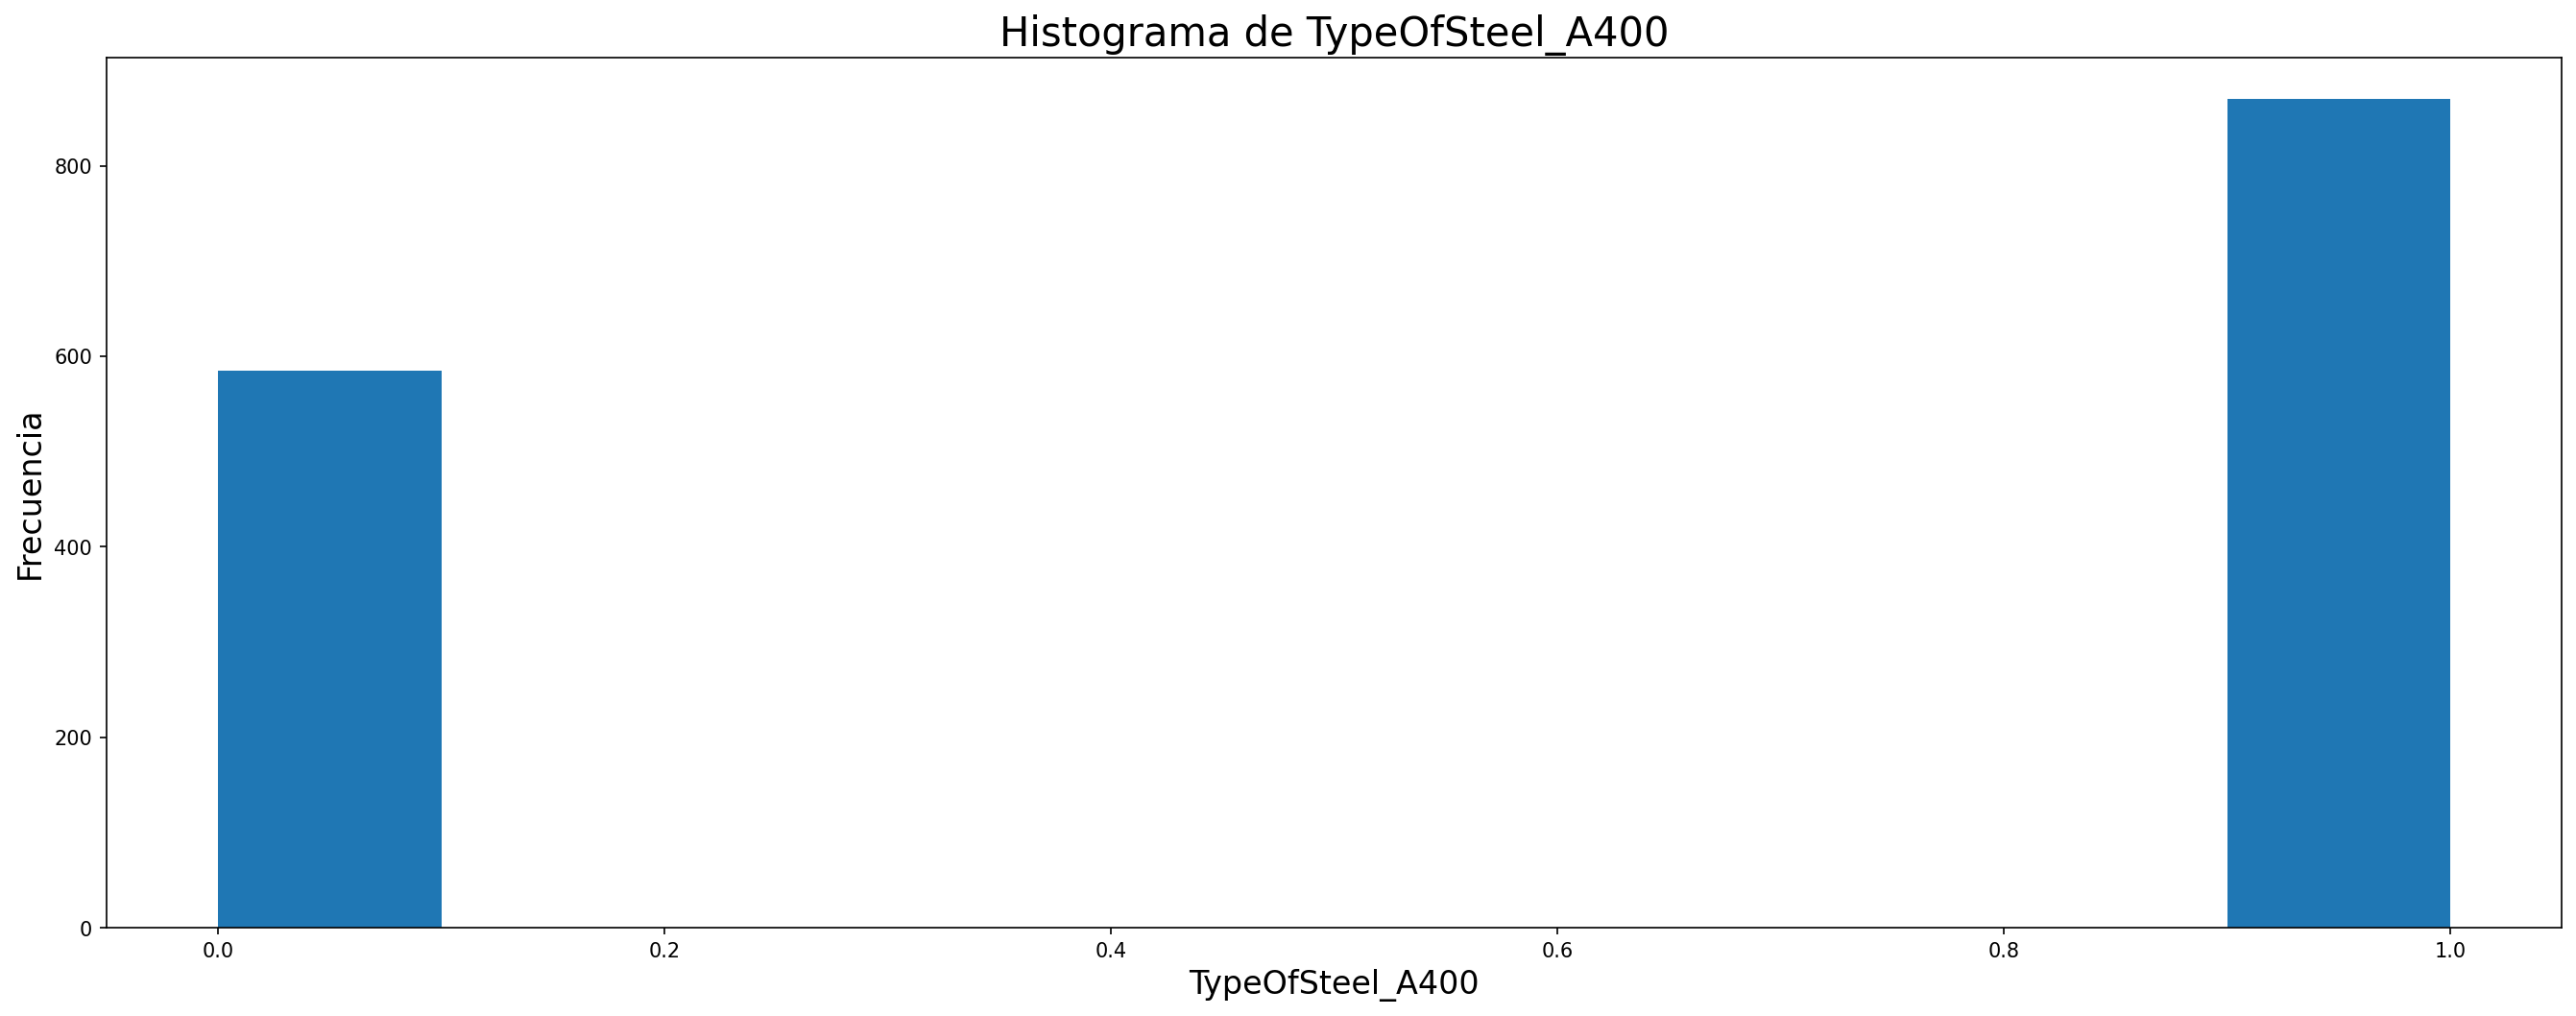

In [68]:
plt.figure(figsize=(22,8))
plt.hist(data_train['TypeOfSteel_A400'])
plt.xlabel(xlabel='TypeOfSteel_A400', fontsize=16)
plt.ylabel(ylabel='Frecuencia', fontsize=16)
plt.title('Histograma de TypeOfSteel_A400', fontsize=20)
plt.show()

## Missing data

In [69]:
# Buscamos si exiten campos que tengan valores nulos en TRAIN
data_train.isnull().sum()

Unnamed: 0               0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [70]:
# Buscamos si exiten campos que tengan valores nulos en TEST
data_test.isnull().sum()

Unnamed: 0               0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

In [71]:
# Buscar filas duplicadas en TRAIN y TEST
print(data_train[data_train.duplicated()])
print(data_test[data_test.duplicated()])

Empty DataFrame
Columns: [Unnamed: 0, X_Minimum, X_Maximum, Y_Minimum, Y_Maximum, Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity, Minimum_of_Luminosity, Maximum_of_Luminosity, Length_of_Conveyer, TypeOfSteel_A300, TypeOfSteel_A400, Steel_Plate_Thickness, Edges_Index, Empty_Index, Square_Index, Outside_X_Index, Edges_X_Index, Edges_Y_Index, Outside_Global_Index, LogOfAreas, Log_X_Index, Log_Y_Index, Orientation_Index, Luminosity_Index, SigmoidOfAreas, Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, X_Minimum, X_Maximum, Y_Minimum, Y_Maximum, Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity, Minimum_of_Luminosity, Maximum_of_Luminosity, Length_of_Conveyer, TypeOfSteel_A300, TypeOfSteel_A400, Steel_Plate_Thickness, Edges_Index, Empty_Index, Square_Index, Outside_X_Index, Edges_X_Index, Edges_Y_Index, Outside_Global_Index, LogOfAreas, Log_X_Index, Log_Y_Index, Orientation_Index, Luminosity_Index, Sigmo

In [72]:
# Buscamos valores que pudieran rellenar los datos, en caso de algun faltante, por ejemplo X_Minimun es de tipo int,
# pero si fuera de tipo Object, entonces pudeira existir alguna cadena con informacion de relleno
data_train['Unnamed: 0'].value_counts()

1937    1
642     1
645     1
646     1
647     1
       ..
1289    1
1290    1
1291    1
1292    1
1       1
Name: Unnamed: 0, Length: 1455, dtype: int64

## Labels

Dentro del dataset, tenemos una columna llamada por default "Unnamed: 0". En esta hay valores enteros que no llevan un orden, comprobamos que quieren expresar estos datos

In [73]:
#Identificamos si los datos vienen etiquetados
data_train['Unnamed: 0'].nunique()

1455

Tenemos como resultado 1455 valores unicos, esto es el tamaño total de instancias en el dataset TRAIN, sin embargo estos numeros no muestran un orden.

In [74]:
# Buscamos si existiera algun valor repetido en esta columna
data_train['Unnamed: 0'].value_counts().head()

1937    1
642     1
645     1
646     1
647     1
Name: Unnamed: 0, dtype: int64

In [75]:
# Conocer cuantas instancias pertenece a cada clase.
data_train[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].value_counts()

Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
0       0          0         0       0          0      1               500
                                                1      0               302
                   1         0       0          0      0               294
        1          0         0       0          0      0               145
1       0          0         0       0          0      0               118
0       0          0         1       0          0      0                54
                             0       1          0      0                42
dtype: int64

## Histogramas

In [76]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150 # cambiamos la resolucion de las figuras
# mpl.rcParams['font.size'] = 10 # cambiamos la resolucion de las figuras

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e875dd050>]],
      dtype=object)

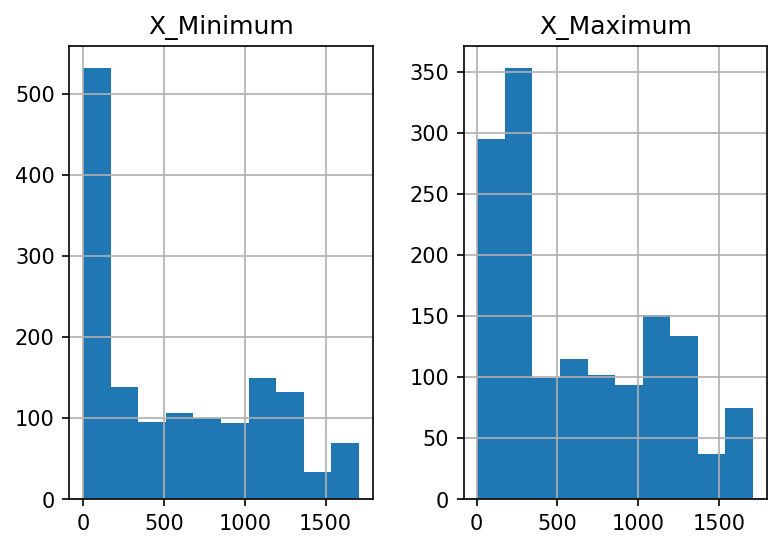

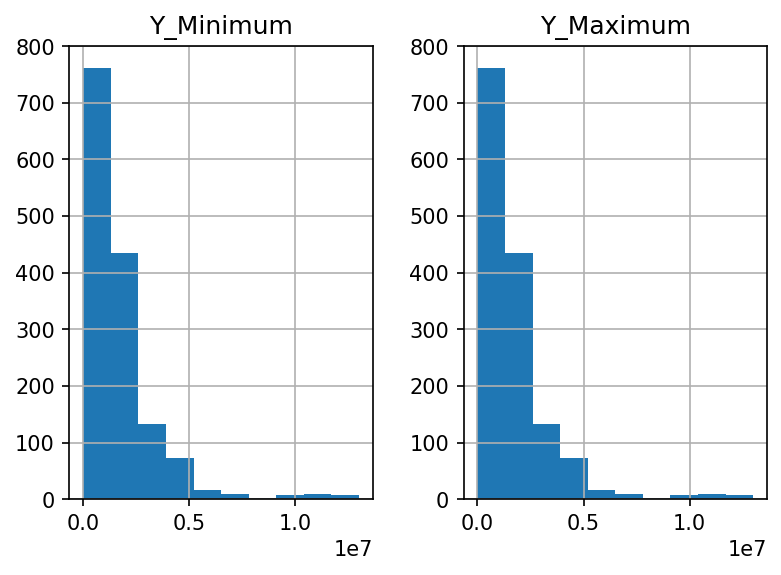

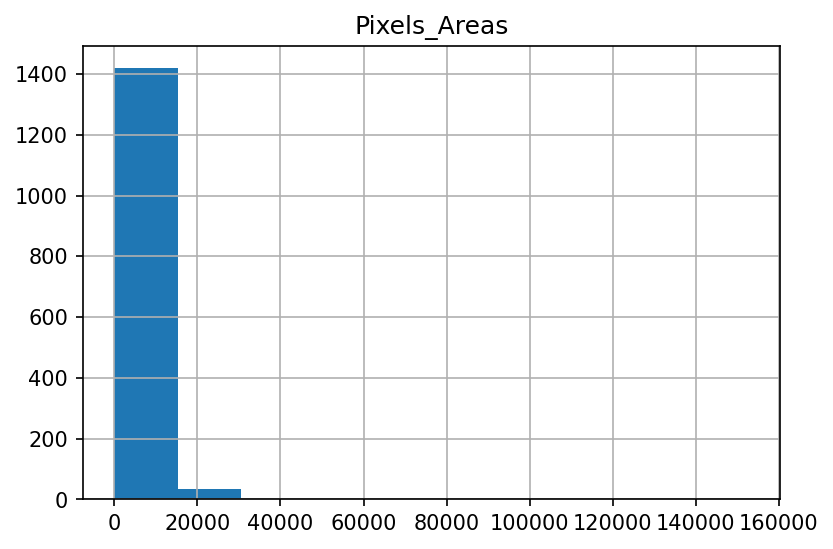

In [77]:
data_train[['X_Minimum', 'X_Maximum']].hist()

data_train[['Y_Minimum', 'Y_Maximum']].hist()

data_train[['Pixels_Areas']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e87943d90>,
      dtype=object)

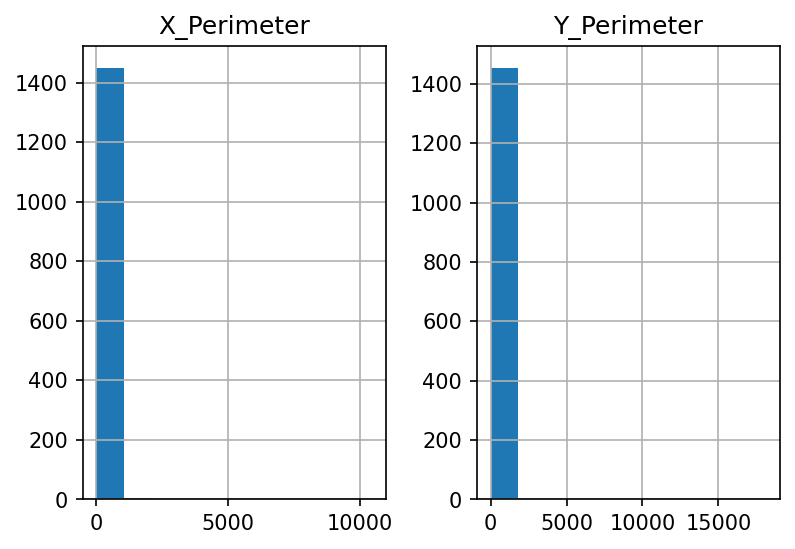

In [78]:
data_train[['X_Perimeter', 'Y_Perimeter']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e91b7d950>,
      dtype=object)

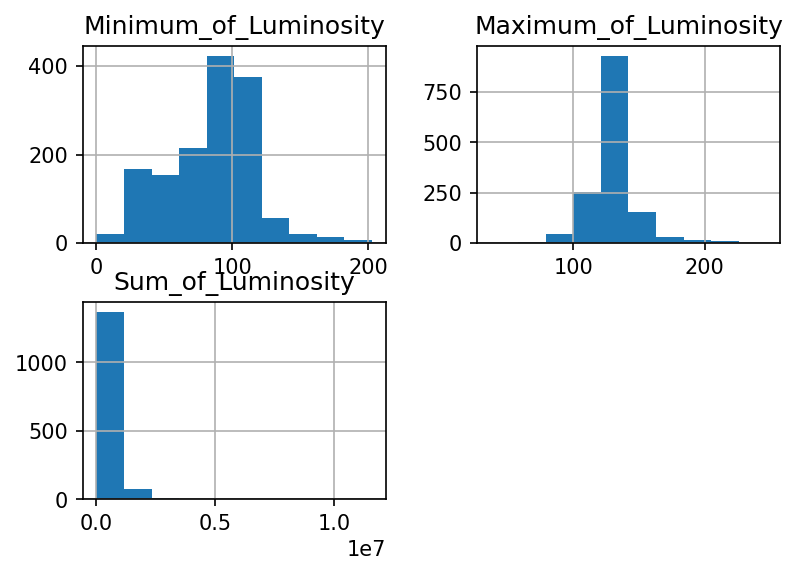

In [79]:
data_train[['Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Sum_of_Luminosity']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e87685910>]],
      dtype=object)

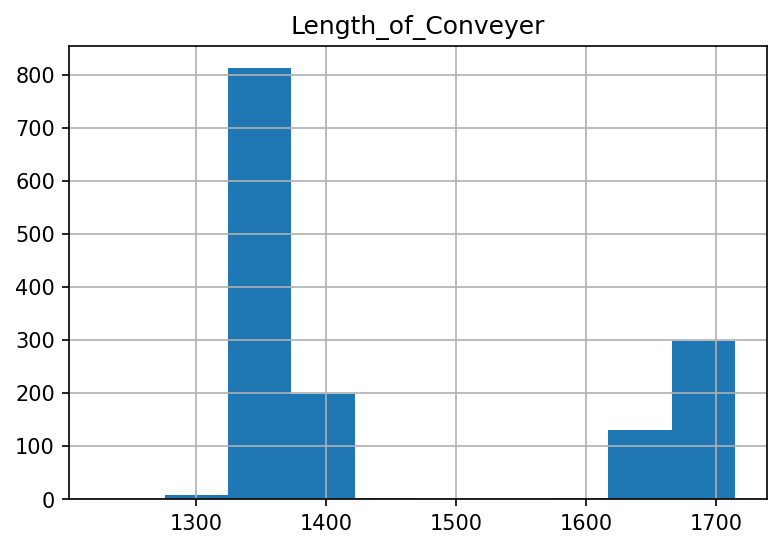

In [80]:
data_train[['Length_of_Conveyer']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e91d38790>]],
      dtype=object)

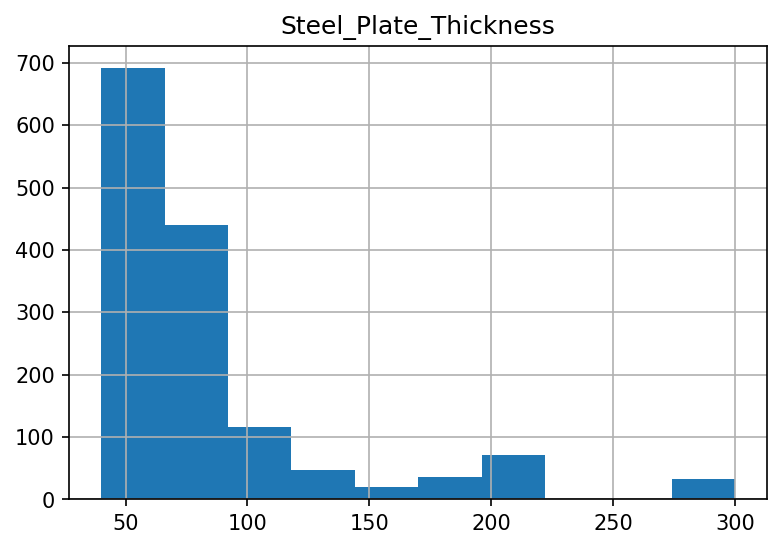

In [81]:
data_train[['Steel_Plate_Thickness']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e879607d0>,
      dtype=object)

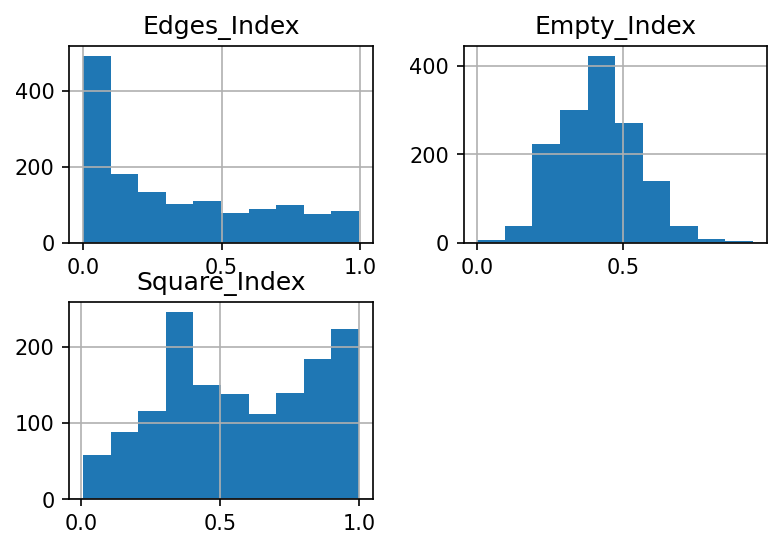

In [82]:
data_train[['Edges_Index', 'Empty_Index', 'Square_Index']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e87a3dc90>,
      dtype=object)

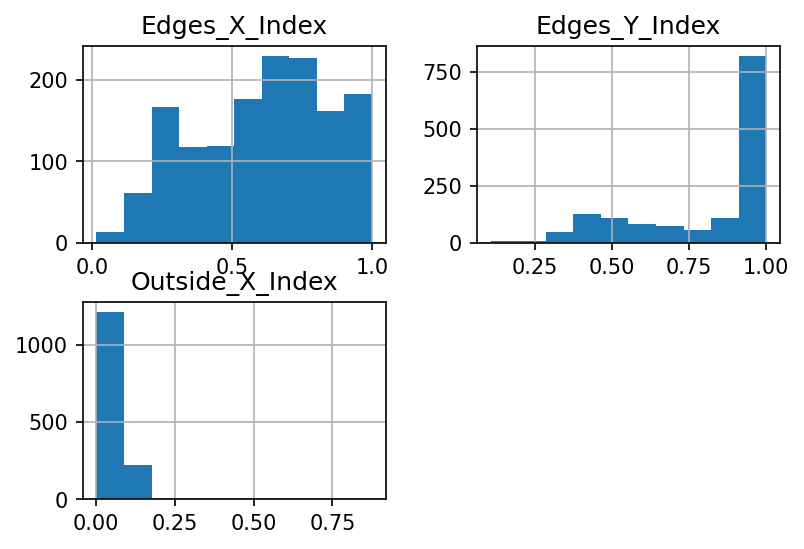

In [83]:
data_train[['Edges_X_Index', 'Edges_Y_Index', 'Outside_X_Index']].hist()

Text(0, 0.5, 'Frecuencia')

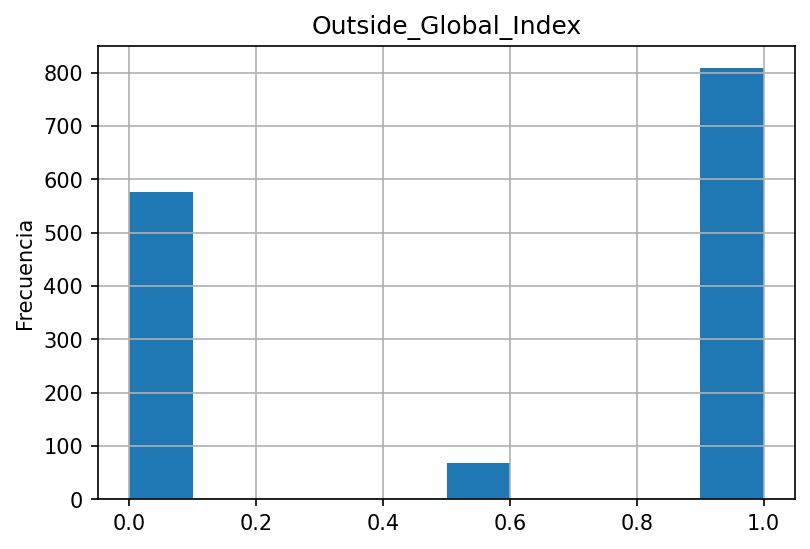

In [84]:
data_train[['Outside_Global_Index']].hist()
plt.ylabel('Frecuencia')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e875fbc90>,
      dtype=object)

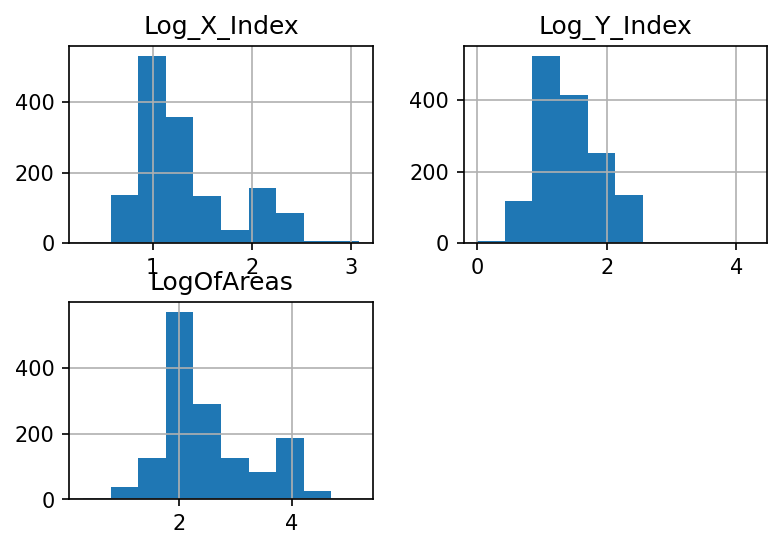

In [85]:
data_train[['Log_X_Index', 'Log_Y_Index', 'LogOfAreas']].hist()

Text(0, 0.5, 'Frecuencia')

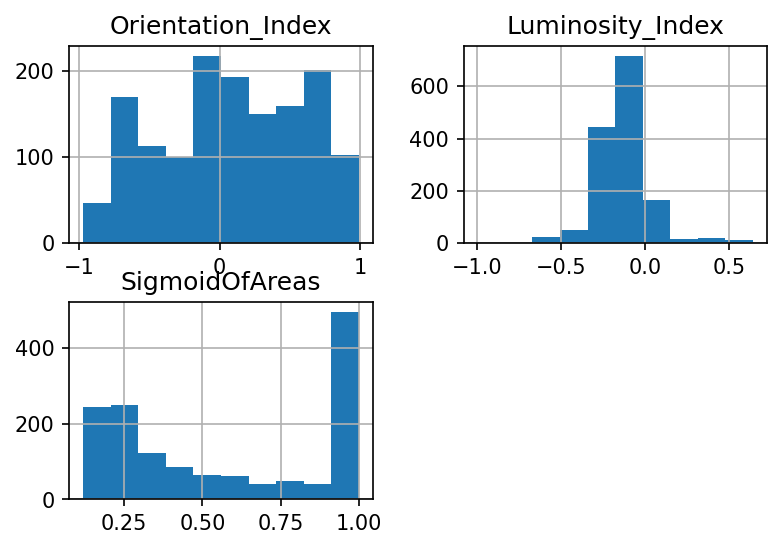

In [86]:
data_train[['Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']].hist()

plt.ylabel('Frecuencia')

## Statistical summaries

In [87]:
# Estadisticos del dataset TRAIN
data_train.describe()

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1455.000000,1455.000000,1455.000000,1.455000e+03,1.455000e+03,1455.000000,1455.000000,1455.000000,1.455000e+03,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000
mean,967.010997,570.035052,616.305155,1.676894e+06,1.676950e+06,1908.098282,113.644674,85.914089,2.069553e+05,84.661168,130.021993,1457.621306,0.402062,0.597938,78.076289,0.335815,0.413715,0.573075,0.032971,0.609169,0.814008,0.579725,2.485212,1.329693,1.401594,0.087881,-0.130914,0.582273,0.081100,0.099656,0.202062,0.037113,0.028866,0.207560,0.343643
std,559.447739,516.641171,493.543539,1.826262e+06,1.826278e+06,5540.549250,331.232990,487.996747,5.333202e+05,32.375866,18.461963,143.593080,0.490483,0.490483,54.269771,0.300130,0.136324,0.272039,0.059277,0.244517,0.234332,0.481609,0.790102,0.480230,0.456280,0.498667,0.151795,0.340529,0.273082,0.299644,0.401676,0.189105,0.167487,0.405699,0.475087
min,1.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.105000,0.000000,0.301000,0.301000,0.000000,-0.973900,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,478.000000,56.000000,194.000000,5.026940e+05,5.028045e+05,82.500000,15.000000,13.000000,9.374000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315000,0.360000,0.006600,0.410800,0.597850,0.000000,1.916450,1.000000,1.079200,-0.295200,-0.195000,0.243200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,965.000000,435.000000,466.000000,1.223690e+06,1.223696e+06,172.000000,26.000000,25.000000,1.898600e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.232300,0.413600,0.555600,0.010000,0.636400,0.950000,1.000000,2.235500,1.146100,1.322200,0.098800,-0.132600,0.496300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1438.500000,1046.500000,1070.000000,2.183653e+06,2.183658e+06,794.000000,82.500000,83.000000,8.165950e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.584000,0.500000,0.833300,0.022750,0.800000,1.000000,1.000000,2.899800,1.505100,1.740400,0.506650,-0.066100,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1937.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,247.000000,1715.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Preproceesamiento

Volvemos a visualizar algunos datos, con sus columnas de los datasets TRAIN y TEST

In [88]:
data_train.head(2)

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,1309,1343,1351,46714,46725,56,11,11,5729,90,117,1362,1,0,70,0.0161,0.3636,0.7273,0.0059,0.7273,1.0,1.0,1.7482,0.9031,1.0414,0.2727,-0.2007,0.1934,0,0,0,0,0,0,1
1,1132,354,370,409908,409918,116,19,10,12174,82,126,1360,0,1,40,0.5206,0.2750,0.6250,0.0118,0.8421,1.0,0.0,2.0645,1.2041,1.0000,-0.3750,-0.1801,0.2792,0,0,0,0,0,1,0


In [89]:
data_test.head(2)

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.215
1,4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.000


In [90]:
# Seleccionamos, de TRAIN, para X_train las columnas de los indices 1 a 27. (Se pone 28 porque toma las columnas en un intervalo abierto) 
# Mismo caso con y_train para las columnas 28 a 34 que pertenecen a los valores de las clases.
X_train, y_train = data_train[data_train.columns[1:28]], data_train[data_train.columns[28:35]]

# Seleccionamos para X_test las columnas de los indices 1 a 27 de TEST
X_test = np.array(data_test[data_test.columns[1:28]])


print(X_train.shape)  # 145 instancias, 27 variables
print(y_train.shape)  # 1455 instancias, 7 clases   <- Labels
print(X_test.shape)   # 485 instanias, 27 variables

(1455, 27)
(1455, 7)
(485, 27)


In [91]:
X_train.head(2)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,1343,1351,46714,46725,56,11,11,5729,90,117,1362,1,0,70,0.0161,0.3636,0.7273,0.0059,0.7273,1.0,1.0,1.7482,0.9031,1.0414,0.2727,-0.2007,0.1934
1,354,370,409908,409918,116,19,10,12174,82,126,1360,0,1,40,0.5206,0.2750,0.6250,0.0118,0.8421,1.0,0.0,2.0645,1.2041,1.0000,-0.3750,-0.1801,0.2792


In [92]:
y_train.head(2)

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0


# Desarrollo del Modelo de Machine Learning

In [93]:
# Librerias a utilizar
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import multilabel_confusion_matrix

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

# Creamos una lista con los nombres de cada clase, respetando el orden en que aparecen en las columnas del dataset original
classses = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [94]:
def deploy_conf_matrix(confusion_matrix, classses, algoritmo):
  fig = plt.figure(figsize=(15,12))
  fig.suptitle(algoritmo, fontsize=20)
  # fig.subplots_adjust(wspace=.25, left=0.035, right=.985, top=.925, bottom=.1)

  for i, (label, matrix) in enumerate(zip(classses, confusion_matrix)):
    plt.subplot(f'33{i+1}')
    labels = [f'not_{label}', label]
    sns.heatmap(matrix, annot=True, square=True, fmt='d', cbar=False, cmap='Blues', xticklabels=labels, yticklabels=labels, linecolor='black', linewidths=1)
    plt.title(labels[0])

  plt.tight_layout()
  plt.show()

## KNN

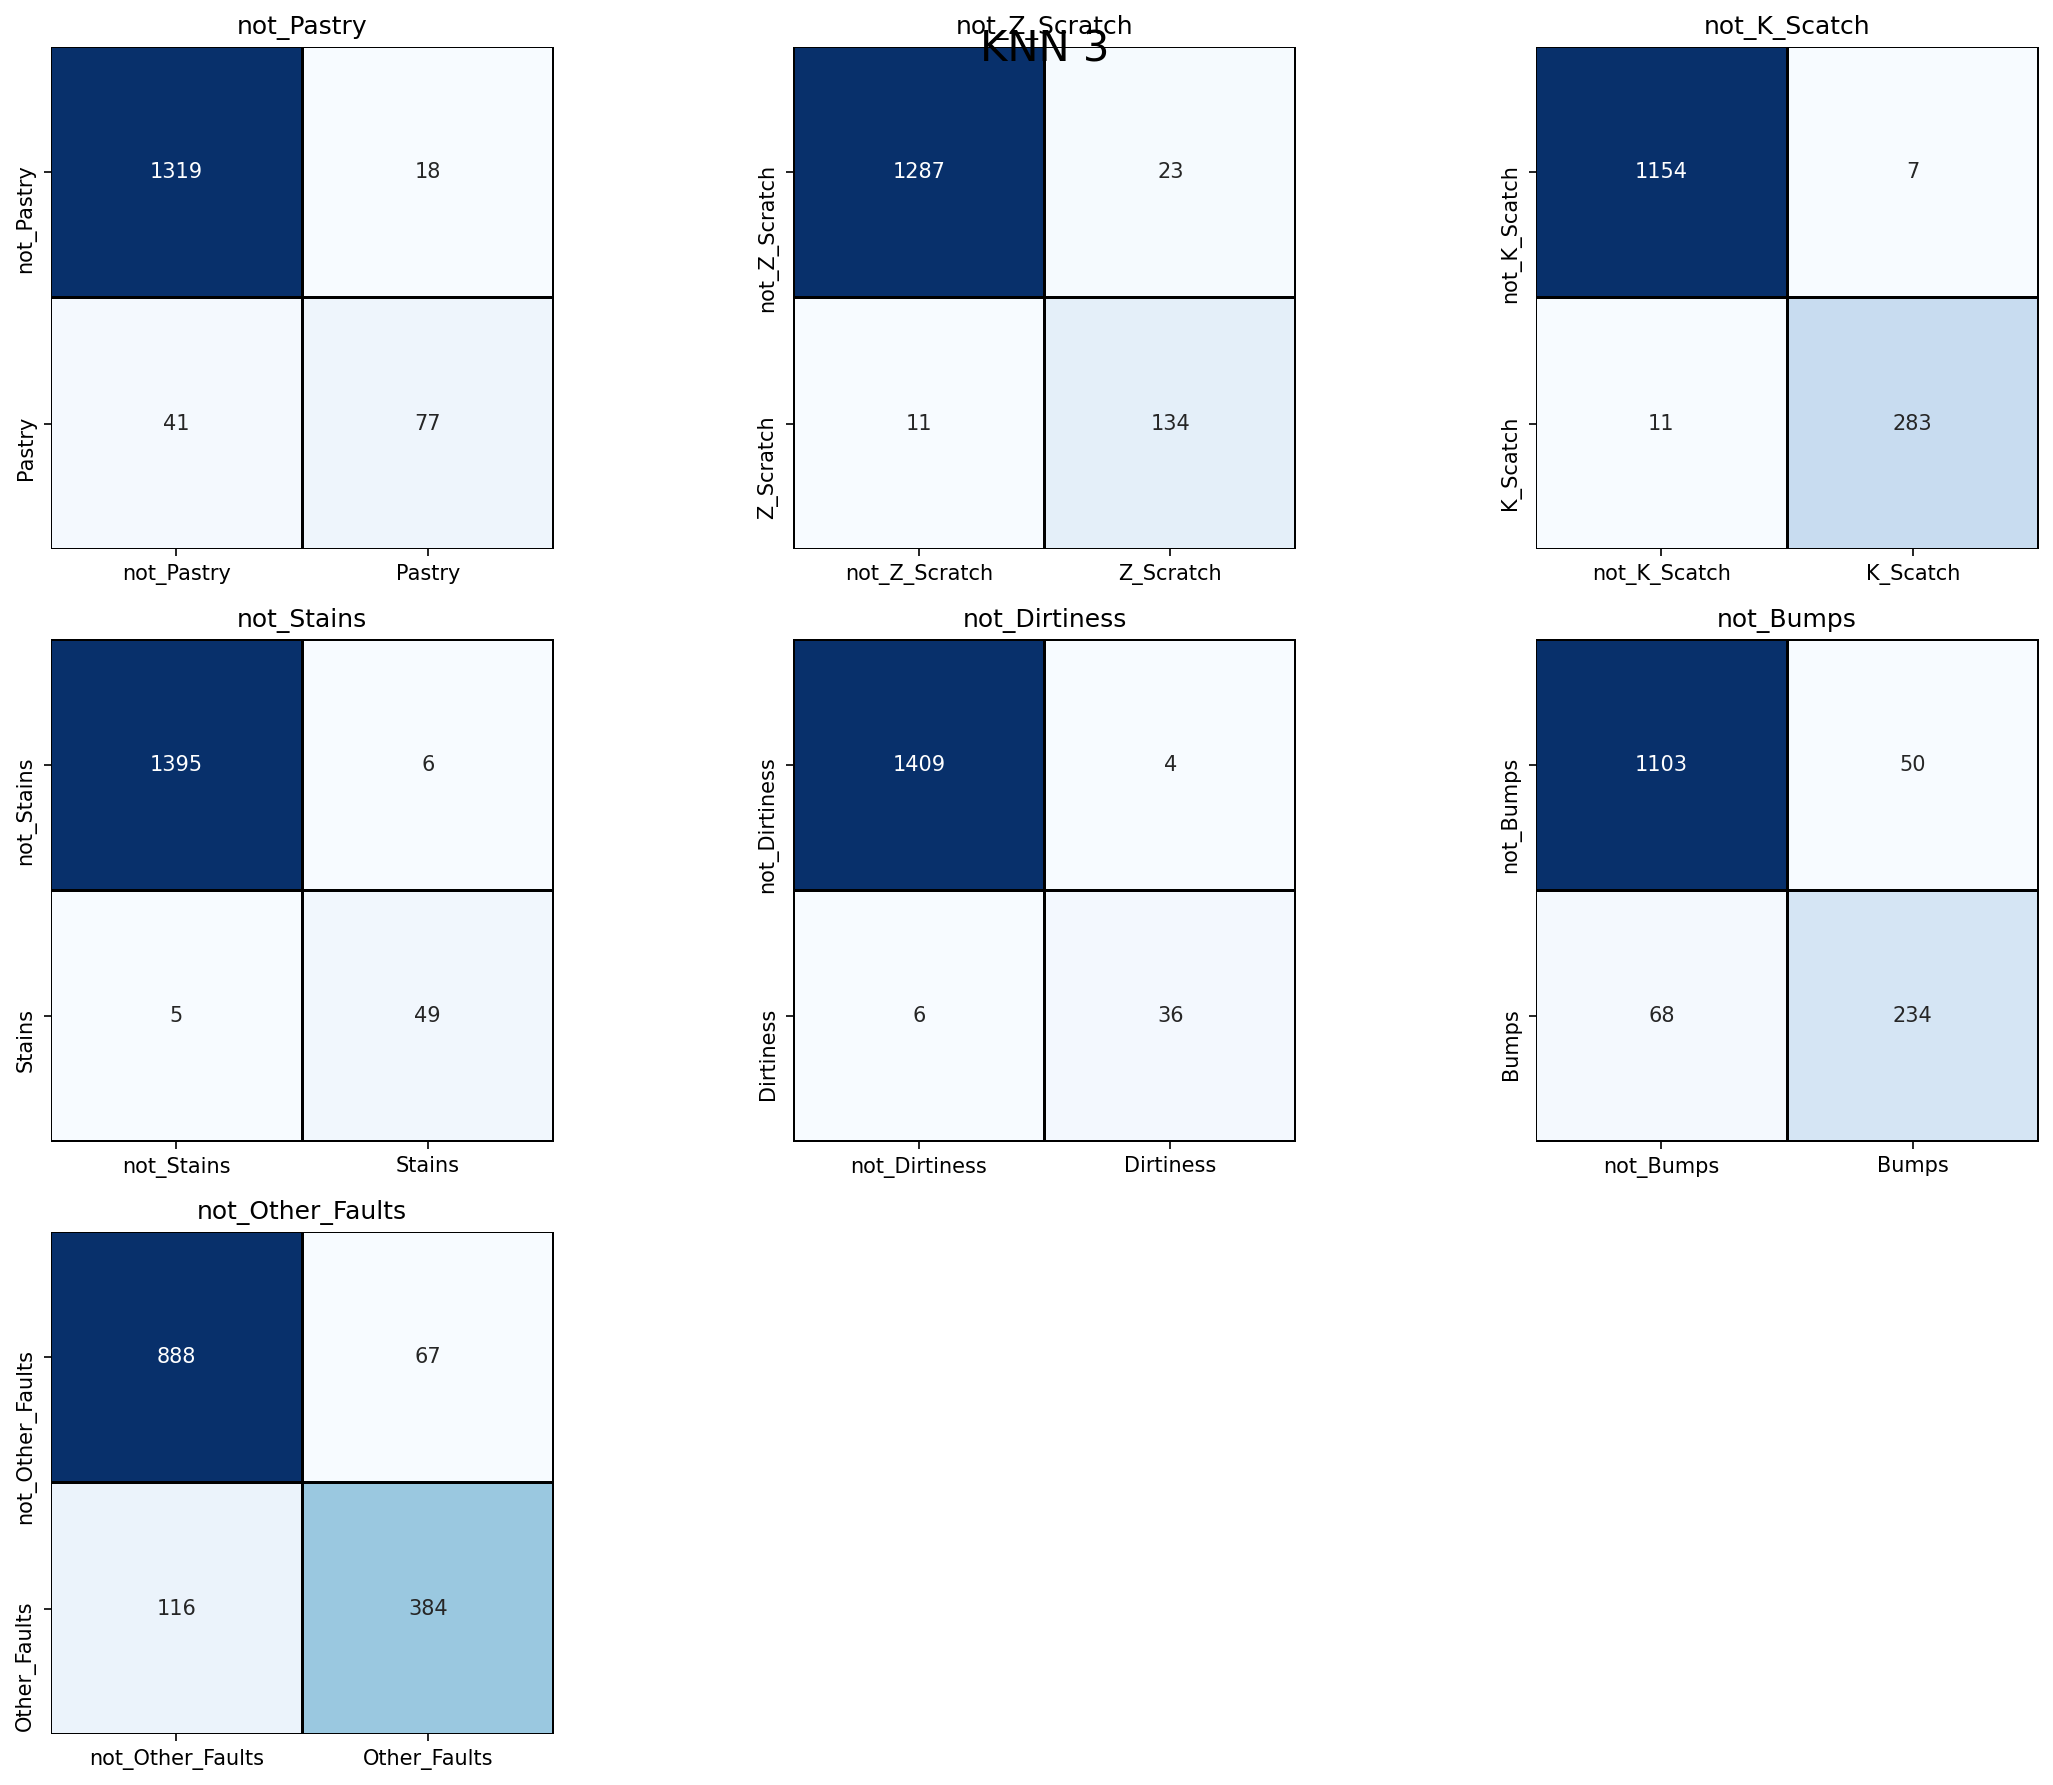

In [95]:
# KNN, trabaja mejor con variables normalzadas entre 0 y 1
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_norm, y_train)
predict1 = knn.predict(X_train_norm)

confusion_matrix1 = multilabel_confusion_matrix(y_train, predict1)
deploy_conf_matrix(confusion_matrix1, classses, 'KNN 3')

## Multi-layer Perceptron

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


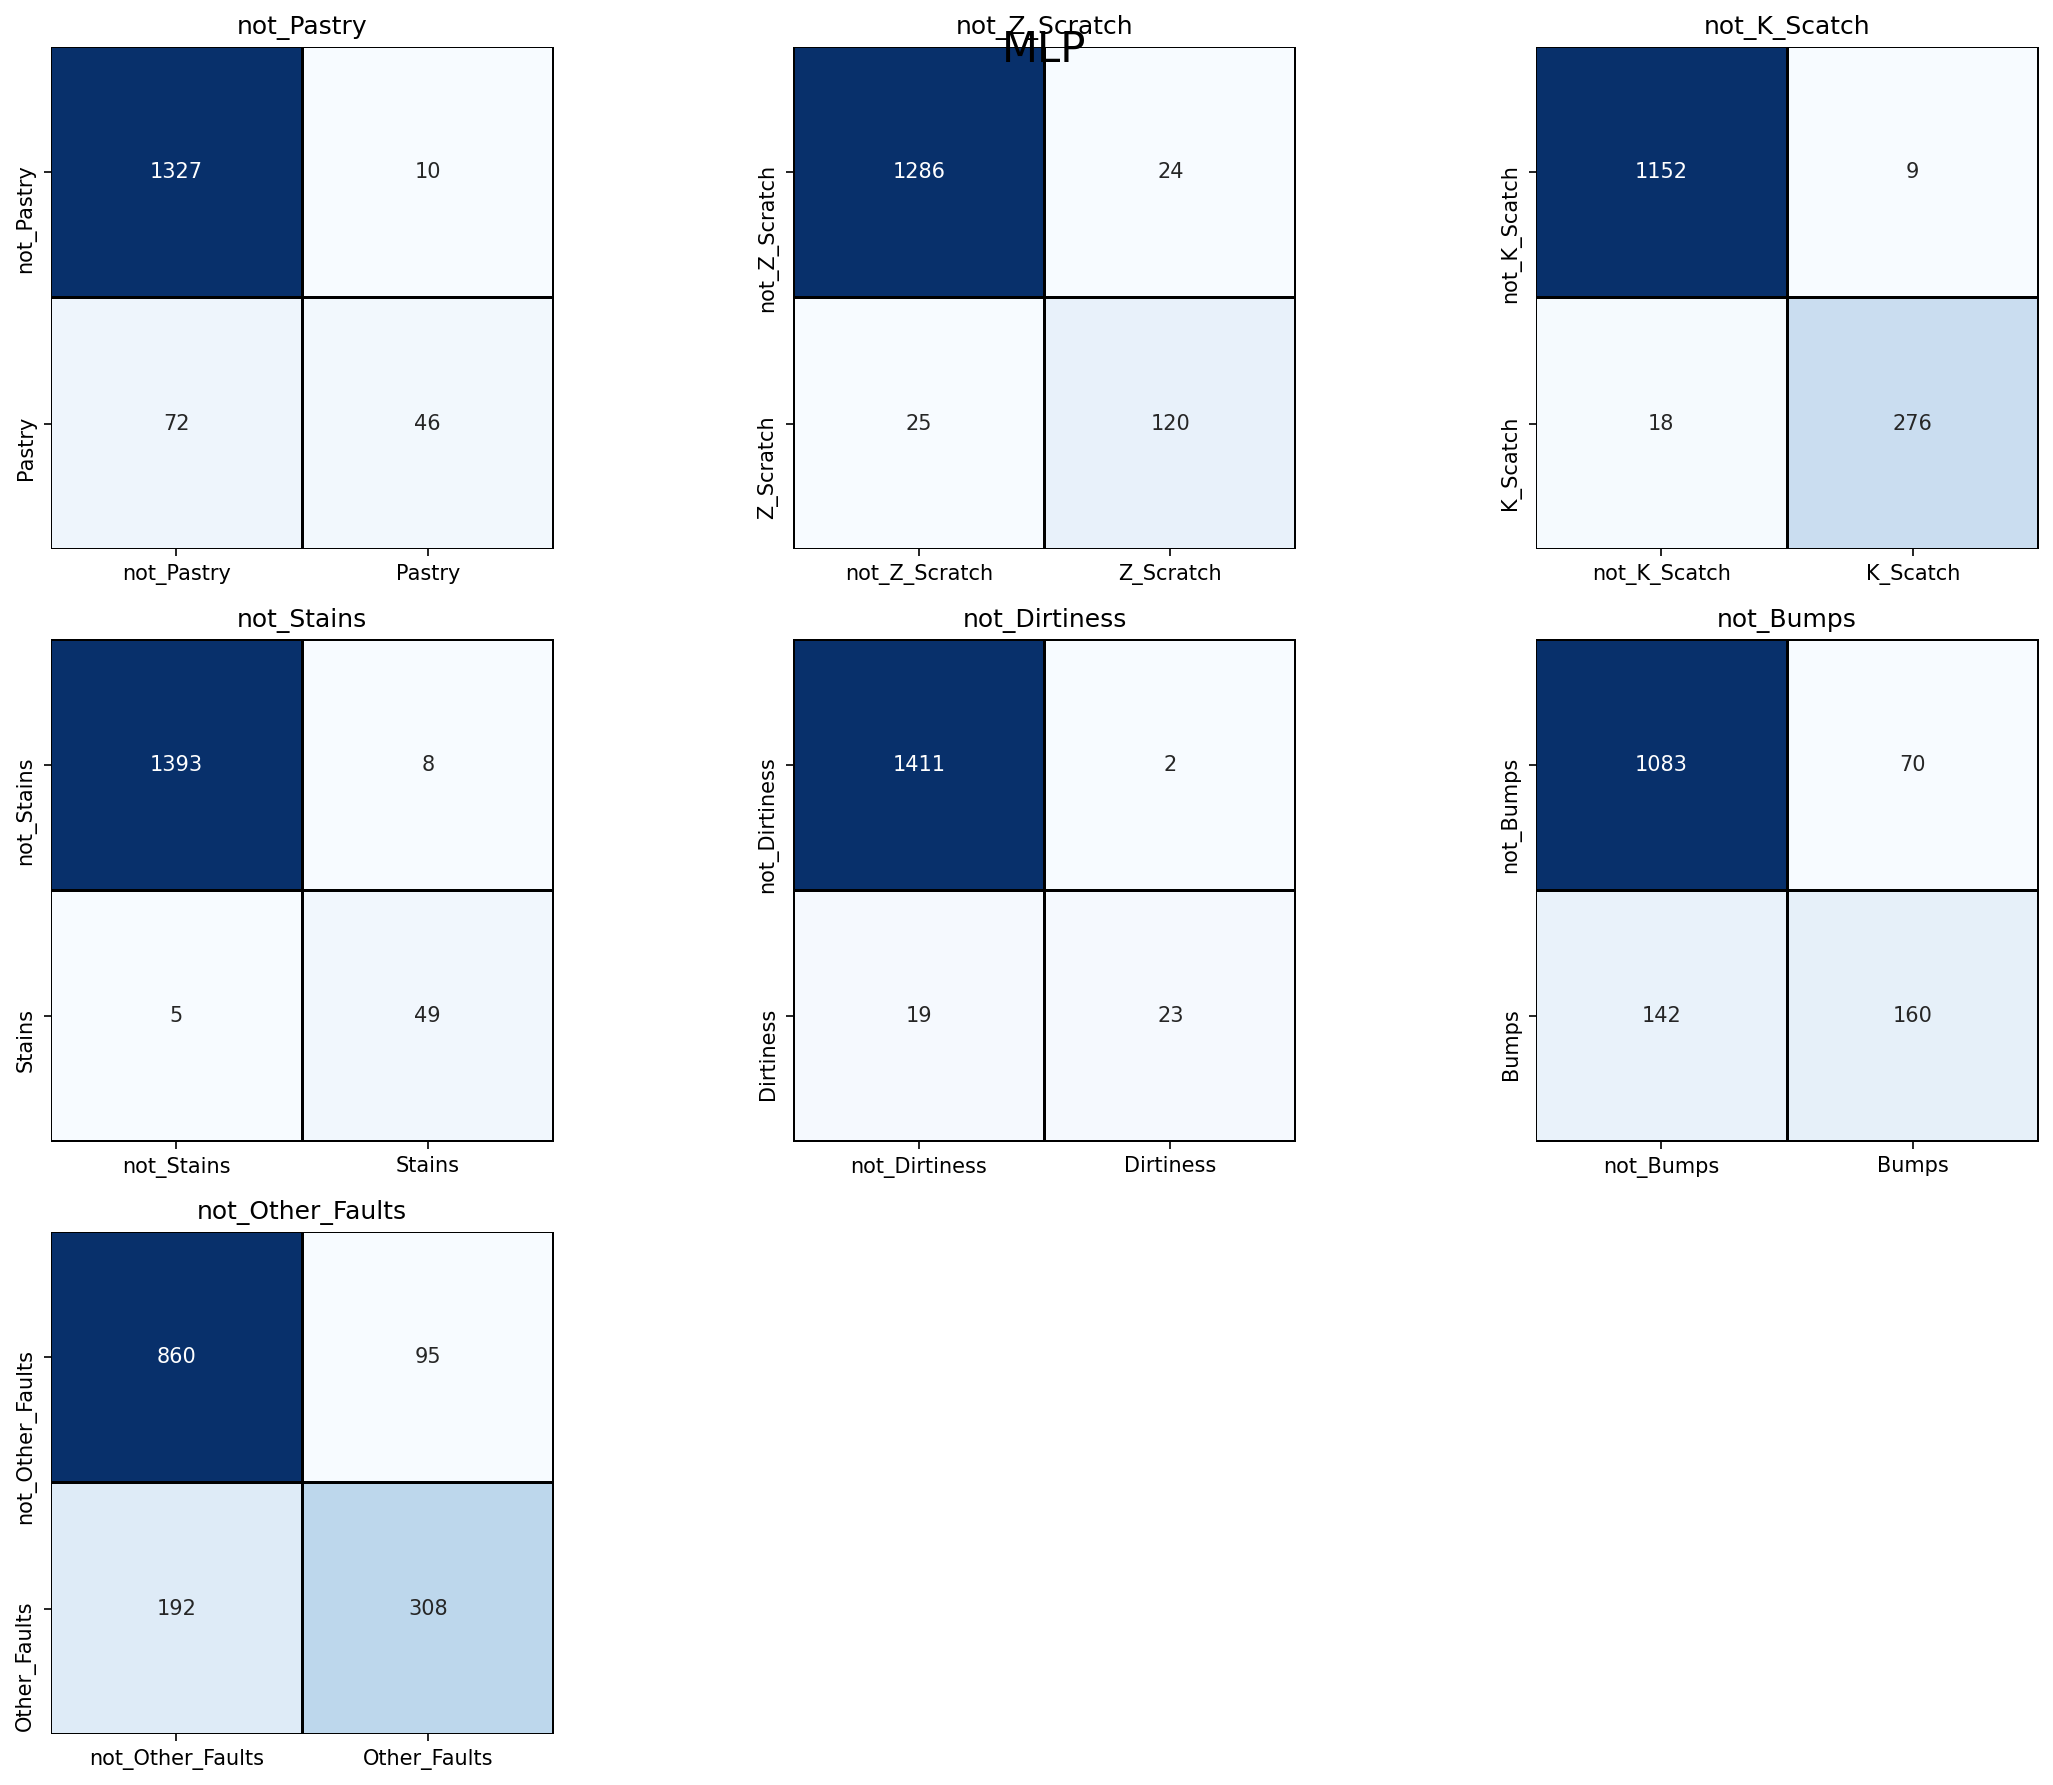

In [96]:
# Red Neuronal MLP, trabaja mejor con variables normalzadas entre 0 y 1
mlp = MLPClassifier(max_iter=300)
mlp.fit(X_train_norm, y_train)
predict2 = mlp.predict(X_train_norm)

confusion_matrix2 = multilabel_confusion_matrix(y_train, predict2)
deploy_conf_matrix(confusion_matrix2, classses, 'MLP')

## Arbol de Decision

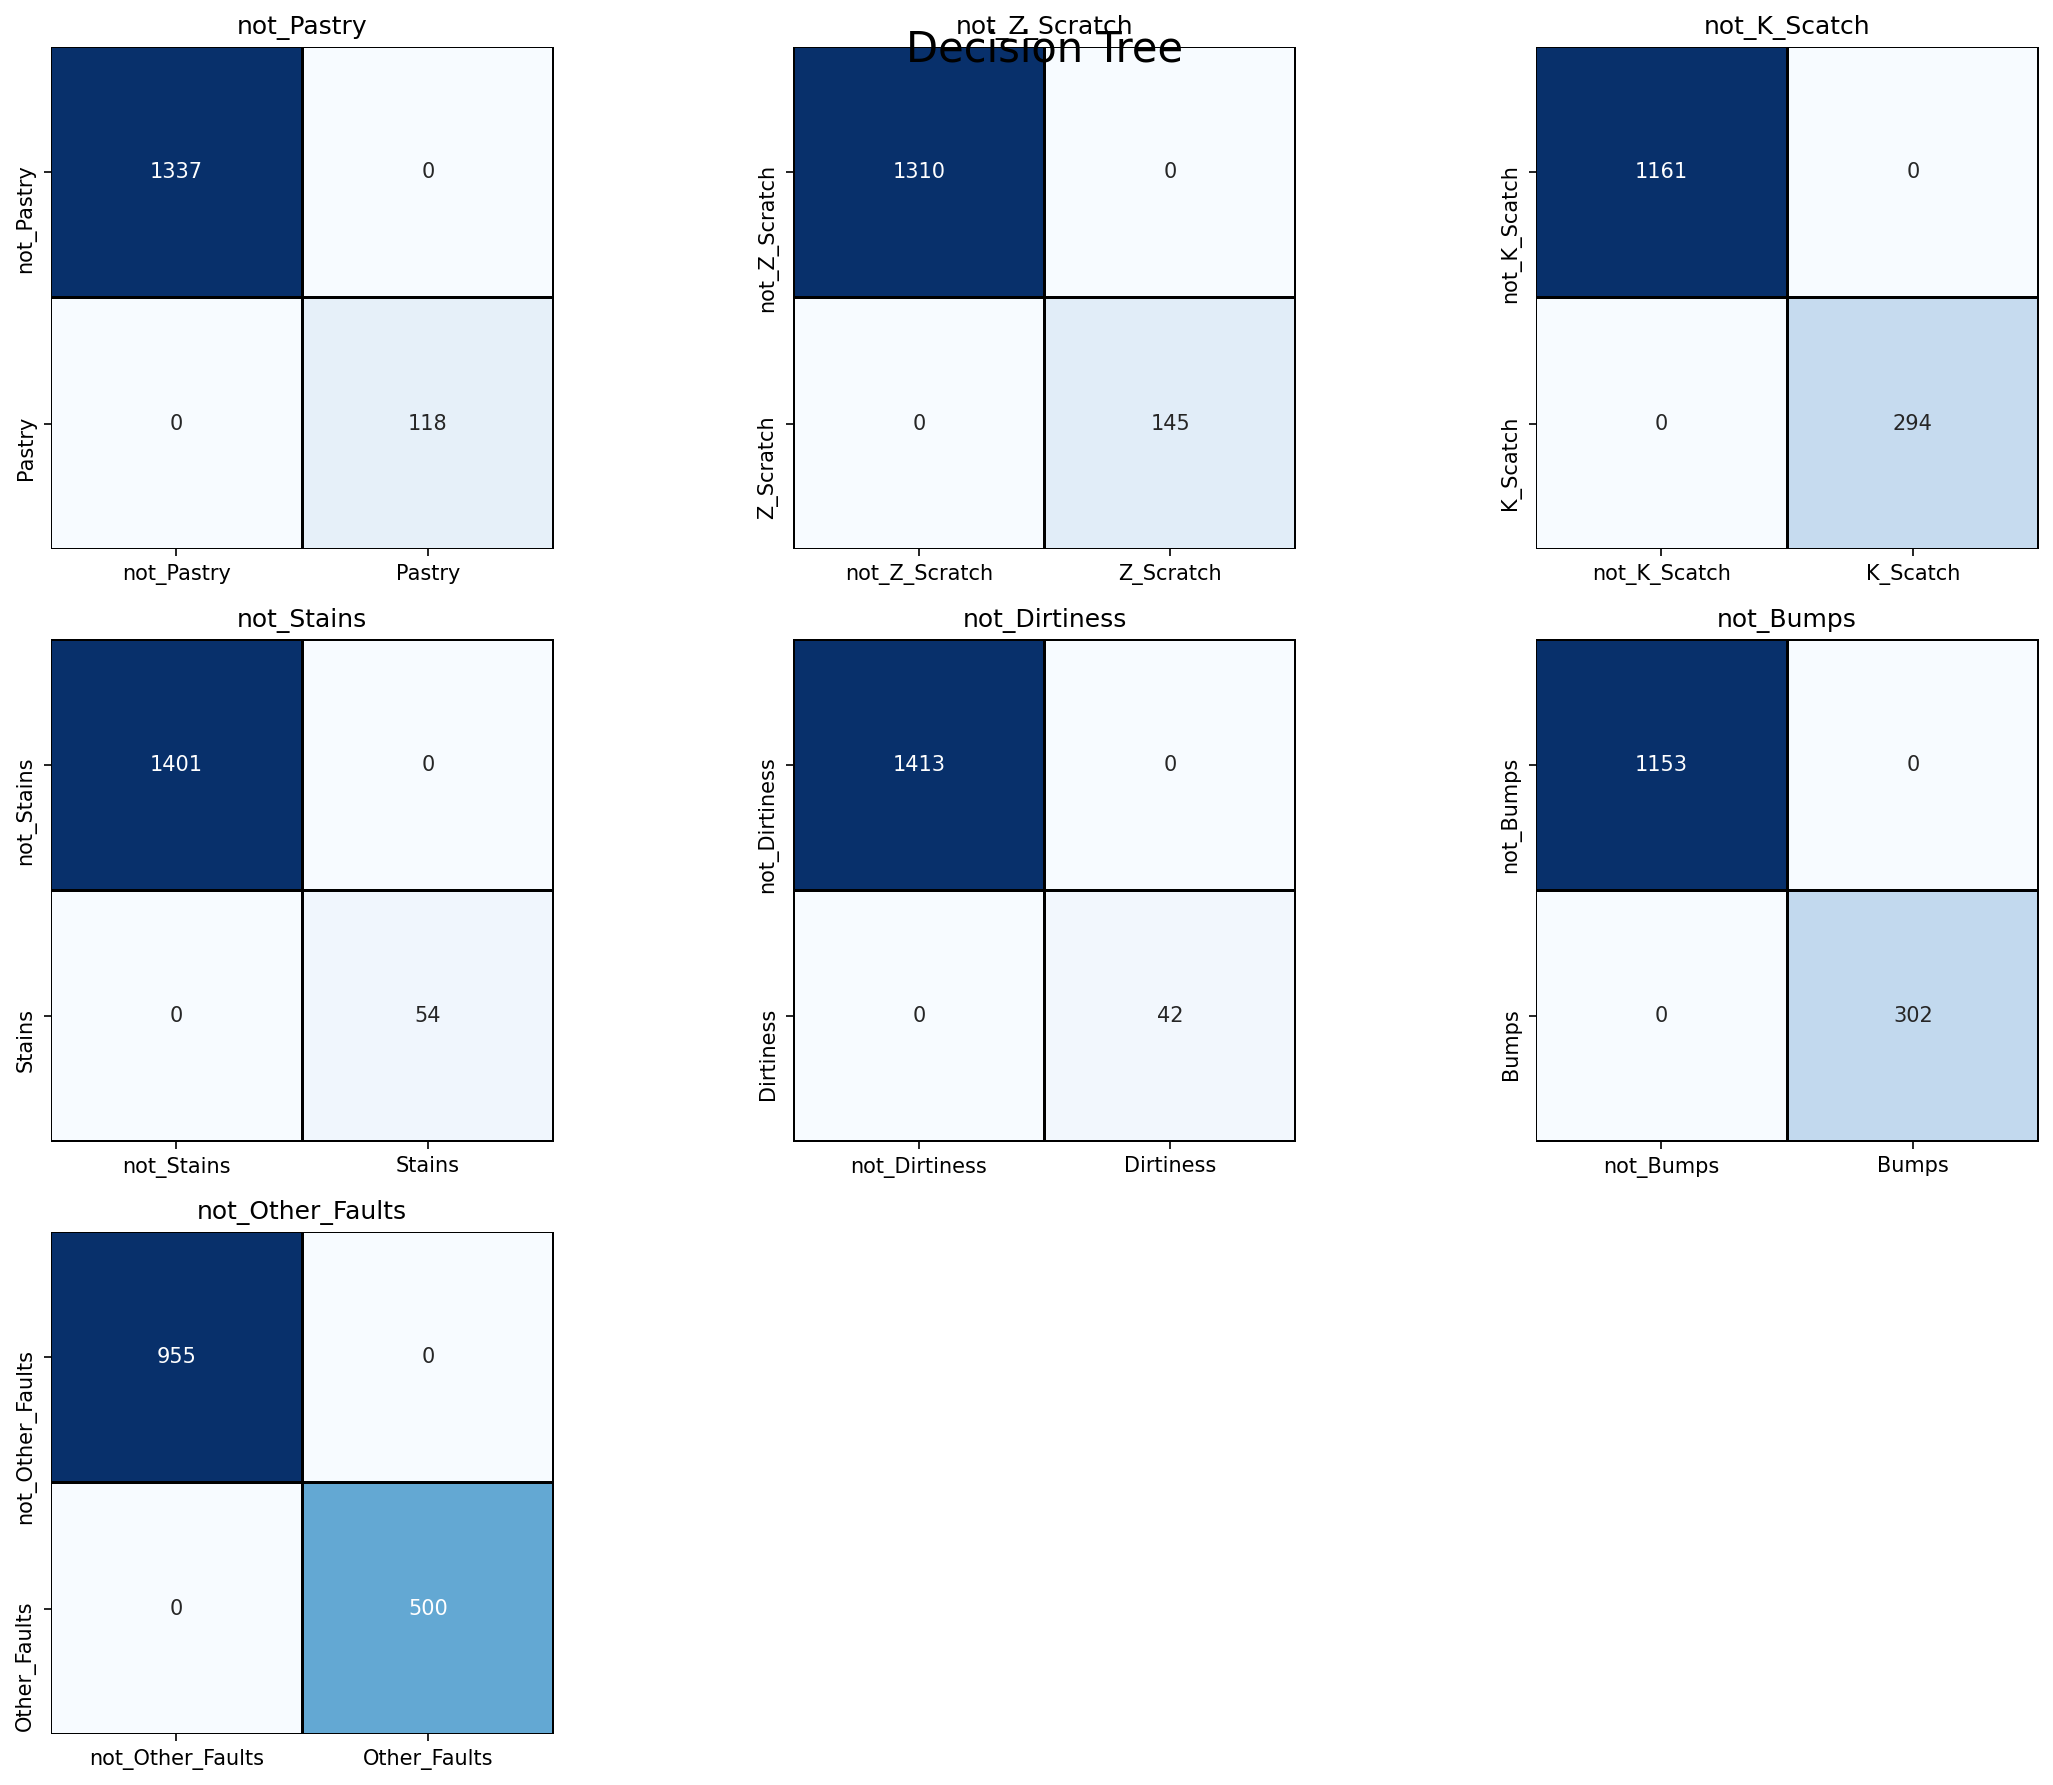

In [97]:
# Arbol de Decision
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

predict3 = decision_tree.predict(X_train)

confusion_matrix3 = multilabel_confusion_matrix(y_train, predict3)
deploy_conf_matrix(confusion_matrix3, classses, "Decision Tree")

## Evalucion de los modelos

In [98]:
from sklearn import metrics

In [99]:
evaluaciones = pd.DataFrame()

#Accuracy
evaluaciones.loc['KNN', 'Accuracy'] = metrics.accuracy_score(y_train, predict1)
evaluaciones.loc['MLP', 'Accuracy'] = metrics.accuracy_score(y_train, predict2)
evaluaciones.loc['DecisionTree','Accuracy'] = metrics.accuracy_score(y_train, predict3)

In [100]:
# Precision
evaluaciones.loc['KNN','Precision'] = metrics.precision_score(y_train, predict1, average='macro')
evaluaciones.loc['MLP','Precision'] = metrics.precision_score(y_train, predict2, average='macro')
evaluaciones.loc['DecisionTree','Precision'] = metrics.precision_score(y_train, predict3, average='macro')

In [101]:
# Recall
evaluaciones.loc['KNN','Recall'] = metrics.recall_score(y_train, predict1, average='macro')
evaluaciones.loc['MLP','Recall'] = metrics.recall_score(y_train, predict2, average='macro')
evaluaciones.loc['DecisionTree','Recall'] = metrics.recall_score(y_train, predict3, average='macro')

In [102]:
# f1
evaluaciones.loc['KNN','F1-score'] = metrics.f1_score(y_train, predict1, average='weighted')
evaluaciones.loc['MLP','F1-score'] = metrics.f1_score(y_train, predict2, average='weighted')
evaluaciones.loc['DecisionTree','F1-score',] = metrics.f1_score(y_train, predict3, average='weighted')

In [103]:
evaluaciones

,Accuracy,Precision,Recall,F1-score
KNN,0.822680,0.872312,0.835236,0.844900
MLP,0.652921,0.837536,0.679574,0.730135
DecisionTree,1.000000,1.000000,1.000000,1.000000


# Predicciones con dataset TEST

In [104]:
predict1_test = knn.predict(X_test_norm)
predict2_test = mlp.predict(X_test_norm) 
predict3_test = decision_tree.predict(X_test)


df_knn_predicts = pd.DataFrame(predict1_test, columns=classses)
df_mlp_predicts = pd.DataFrame(predict2_test, columns=classses)
df_tree_predicts = pd.DataFrame(predict3_test, columns=classses)

In [105]:
df_tree_predicts

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
480,0,0,0,0,0,0,1
481,0,0,0,0,0,0,1
482,0,0,0,0,0,0,1
483,0,0,0,0,0,0,1


# Guardar las predicciones de TEST

**NOTA:** El archivo en formato tabla, con las clases concatenadas al final del archivo, siguiendo el formato del archivo TRAIN.

In [106]:
# data_test = pd.read_csv('Faults.test', delimiter='\t')
data_test.head(2)

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.215
1,4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.000


In [107]:
# Agregamos las prediciones hechas para los datos de TEST en el dataframe inicial "data_test" que es donde se guardó la informacion de TEST al inicio de la ejecucion
data_test[classses] = df_tree_predicts
data_test.head(2)

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.215,0,0,0,0,0,1,0
1,4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.000,0,0,0,0,0,0,1


In [108]:
# with open('Faults_temp.test', 'w') as f:
#   for line in data_test:
#     f.write(line)
#     f.write('\n')
data_test.rename(columns={'Unnamed: 0':'\"\"'}, inplace=True)
data_test.to_csv('Faults_completed.test', header=True, index=None, sep='\t', mode='a')

# Extra

## Visualizacion del arbol de decision entrenado.

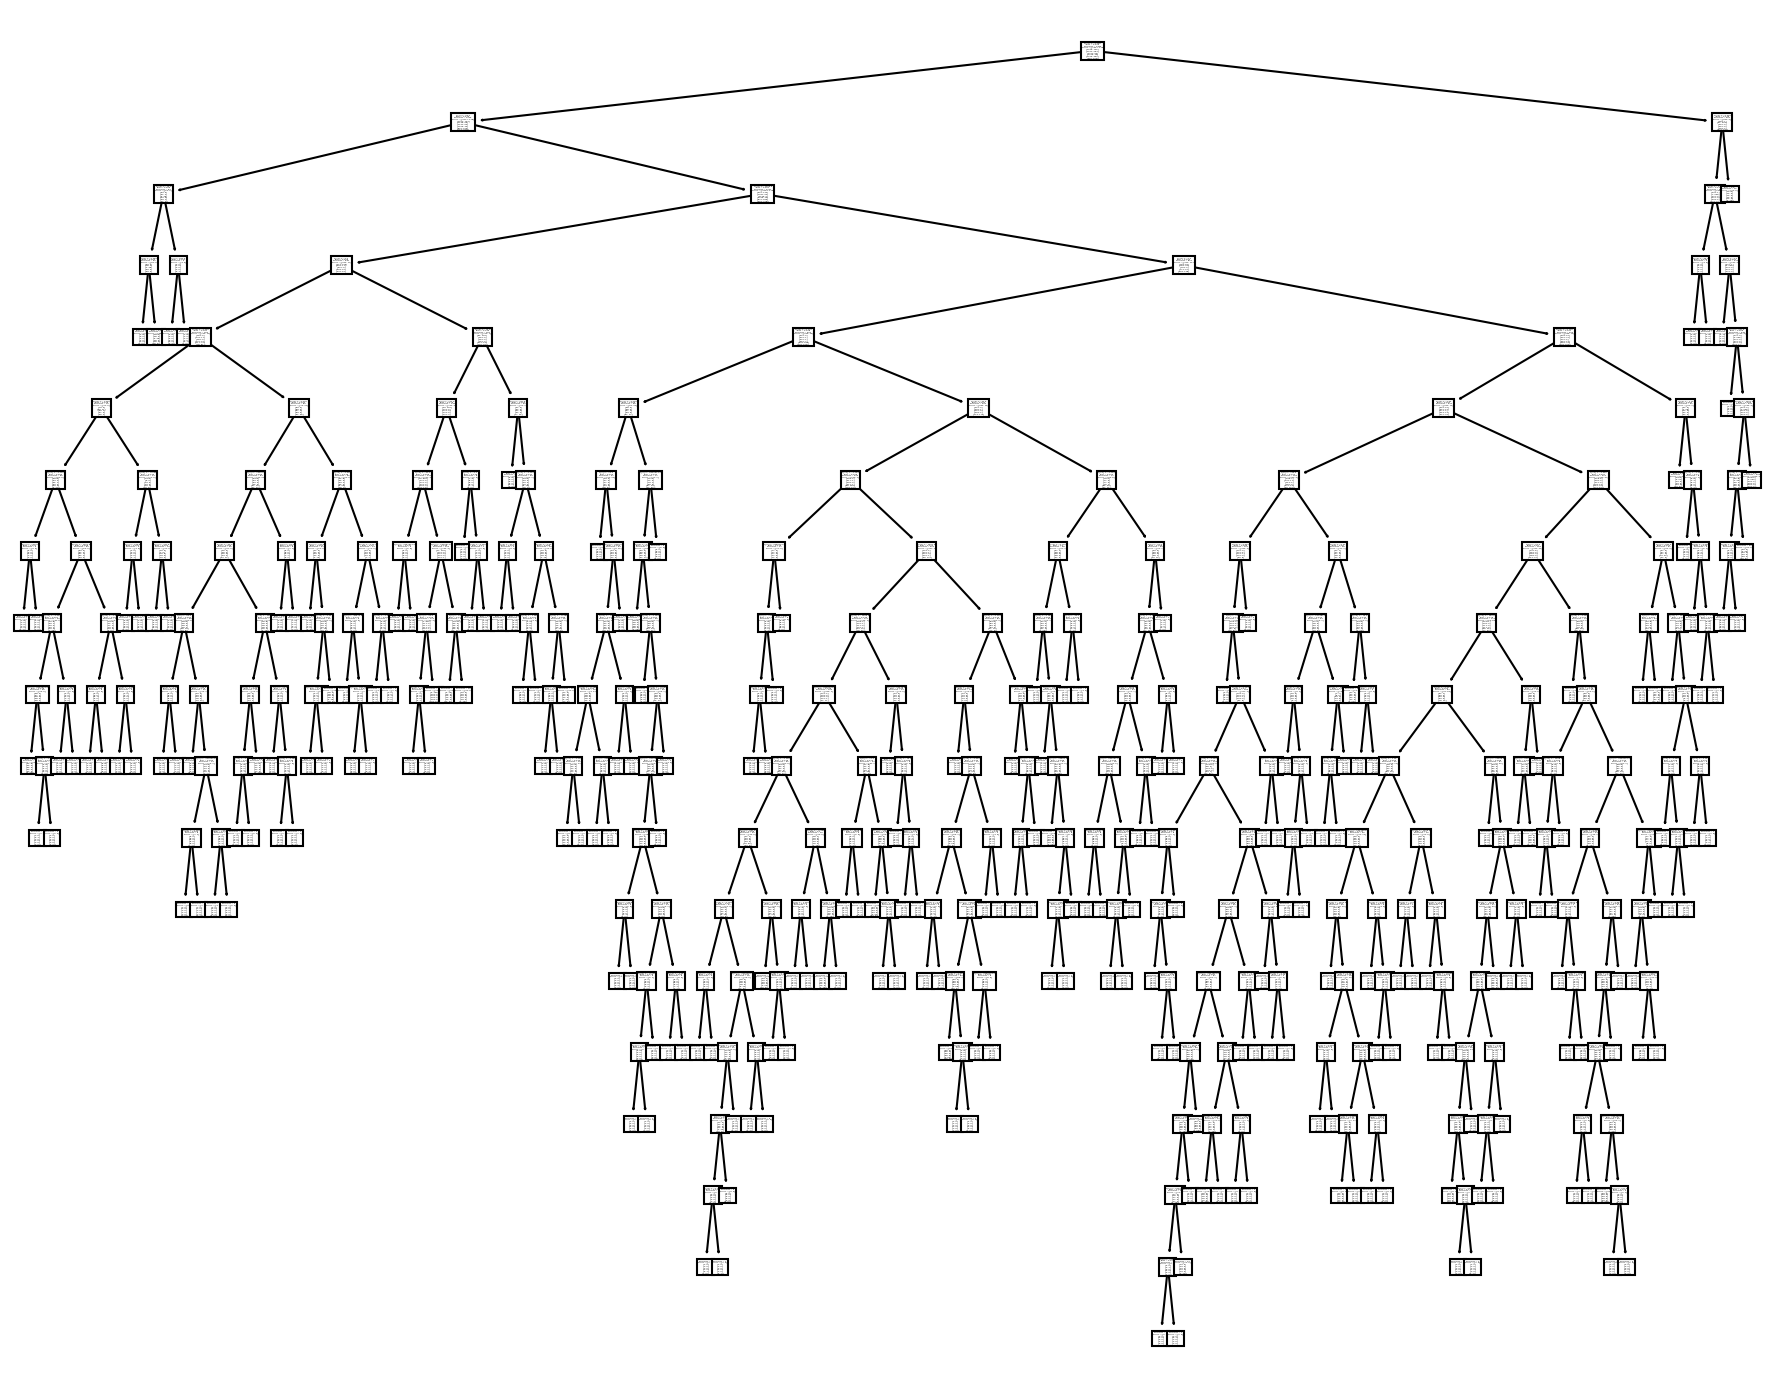

'Tecnoap_decision_tree.pdf'

In [109]:
plt.figure(figsize=(15,12))
sklearn.tree.plot_tree(decision_tree)
plt.show()

import graphviz

dot_data = sklearn.tree.export_graphviz(decision_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Tecnoap_decision_tree") 



## Feature Importance generado por el arbol de decision entrenado


In [110]:
importance = pd.DataFrame({'feature': X_train.columns, 'importance' : np.round(decision_tree.feature_importances_, 4)})

importance.sort_values('importance', ascending=False, inplace = True)

print(importance)

                  feature  importance
17        Outside_X_Index      0.1991
13  Steel_Plate_Thickness      0.0786
10     Length_of_Conveyer      0.0690
14            Edges_Index      0.0648
4            Pixels_Areas      0.0490
11       TypeOfSteel_A300      0.0480
25       Luminosity_Index      0.0479
19          Edges_Y_Index      0.0425
8   Minimum_of_Luminosity      0.0407
16           Square_Index      0.0399
1               X_Maximum      0.0357
3               Y_Maximum      0.0314
12       TypeOfSteel_A400      0.0302
24      Orientation_Index      0.0299
9   Maximum_of_Luminosity      0.0266
2               Y_Minimum      0.0258
15            Empty_Index      0.0249
0               X_Minimum      0.0232
22            Log_X_Index      0.0221
18          Edges_X_Index      0.0179
23            Log_Y_Index      0.0116
26         SigmoidOfAreas      0.0110
7       Sum_of_Luminosity      0.0099
5             X_Perimeter      0.0083
6             Y_Perimeter      0.0052
21          

# ****  **Solución y Justificación** ****


## Data Exploration & Cleaning
*   Se exploró el dataset para encontrar algun dato faltante, ademas se identifico que tipo de variable se registraban en el dataset.
*   Fué importante conocer el rango de las variables para detectar variables continuas y categoricas.
*   Se visualizó como estaban descritas de origen las etiqeutas que representaban la clase de cada instancia, se trabajaron como venian de origen, de forma multilabel.
*   Los histogramas fueron necesarios para conocer visualmente como era la distrubcion de los datos de cada variable.
*   Se obtuvo el registro estadistico de cada variable.






## Preprocesamiento

En este apartado se filtro de dataset TRAIN quitando el posible ID identificado en la fase de la exploracion de los datos, ademas de las etiquetas que representaban los datos.

Algo similar con el dataset TEST fue realizado. En este sólo se omitió la columna del ID.

También se llevó a cabo una normalizacion escalonada de estos datos para mejorar el desempeño de clasificación con los algoritmos KNN y la Red Neuronal, ya que estos son mas sensibles a trabajar con datos normalziados.

## Desarrollo del Modelo
*   Se propusieron tres experimentos diferentes, uno con un algoritmo de aprendizaje supervisado diferente: KNN, Red Neuronas de Segunda Generacion y Arbol de Decision.
*   Se planteó hacer la clasificacion con un algoritmo sencillo como lo es KNN, sin embargo no se tenian resultados buenos, por lo que se aplicó una Red Neuronal, pero al hacer 300 iteraciones, este modelo tampoco generaba buenos resultados.
*   El Arbol de Decision se prefirió utilizar dado a su gran alcance para separar el espacio de las variables. Este modelo generaba mejores resultados utilizando todas las variables independientes para clasificacion.

Se obtuvieron las matriz de confusión  para cada algoritmo, a partir de esta matriz, se obtuvieron las métricas para evaluar los algoritmos. Estas métricas son Accuracy, Precisiion Recall, F1-Score.

## Evaluacion de los modelos

Accuracy: La porcion de instancias que fueron correctamente clasificados.

Precision: La porcion de predicciones correctas entre todas las predicciones de una determinada clase.

Recall: La porcion de instancias de una determinada clase que han sido predichos por el modelo como pertenecientes a esa clase.

F1-score: Para una determinada clase, es la media armónica de su precision y su recall. Sirve como medida global de la calidad de las predicciones de un clasificador.


Teniendo en cuenta lo anterior, se observa que para la Red NEuronal (MLP) su rendimiento para clasificar patrones sin conocer es muy bajo en comparacion con KNN.


El rendimiento de estos dos algoritmos es entendible, dado a que el dataset TRAIN no estaba balanceado las clases. Por mencionar: 
* Other_Faults -> 500 registros
* Bumps        -> 302 registros
* Dirtiness    -> 42 registros
* Stains       -> 54 registros
* K_Scatch     -> 294 registros
* Z_Scratch    -> 145 registros  
* Pastry       -> 118 registros


Sin embargo, El Arbol de Decision, por sus caracteristicas de dividir el espacio de busqueda (en dos ramas, en este caso). Divide recursivamente los registros del conjunto de datos de entrenamiento en subconjutos de registros con valores similares para la variable objetivo. Se lleva a cabo una busqueda exhaustiva de todas las variables disponibles y de todos las divisiones posibes, seleccionado la division optima.


Con esto solventamos que TRAIN no este balanceado. Otra opcion era crear instancias artificiales de los datos existentes para incrementar las instancias por cada clase.



* La prediccion de la clase para cada instancia de TEST * se guarda en un archivo de text llamado "Faults_completed.test".


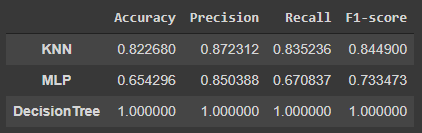